In [1]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = "/content/drive/MyDrive/Dataset"
import os
os.chdir(root_dir)

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

In [3]:
def load_images_from_directory(directory, target_size=(128, 128)):
    images = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        img = load_img(filepath, target_size=target_size)
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
    return np.array(images)

In [4]:
train_dir = "prepared_data/train"
val_dir = "prepared_data/val"


In [5]:
# x_train = load_images_from_directory(train_dir)
# x_val = load_images_from_directory(val_dir)

In [6]:
# import pickle

# with open('x_train.pkl', 'wb') as f:
#     pickle.dump(x_train, f)

# with open('x_val.pkl', 'wb') as f:
#     pickle.dump(x_val, f)

# print("Data saved as pickle files.")

In [8]:
import pickle
with open('x_train.pkl', 'rb') as f:
    x_train = pickle.load(f)

with open('x_val.pkl', 'rb') as f:
    x_val = pickle.load(f)

print("Data loaded from pickle files.")


Data loaded from pickle files.


In [9]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_val_noisy = x_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape)


In [10]:
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_val_noisy = np.clip(x_val_noisy, 0.0, 1.0)

In [11]:

input_img = Input(shape=(128, 128, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, mode='min')

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')

# Train model with callbacks
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=200,
    batch_size=32,
    shuffle=True,
    validation_data=(x_val_noisy, x_val),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)


Epoch 1/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019

750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0019 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 2/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0017 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 3/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0017 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 4/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0017 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 5/200
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0017 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 6/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0017 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 7/200
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 5.0000e-04
Epoch 8/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 5.0000e-04
Epoch 9/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 5.0000e-04
Epoch 10/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 5.0000e-04
Epoch 11/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 5.0000e-04
Epoch 12/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 2.5000e-04
Epoch 13/200
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 2.5000e-04
Epoch 14/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 2.5000e-04
Epoch 15/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 2.5000e-04
Epoch 16/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 2.5000e-04
Epoch 17/200
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.2500e-04
Epoch 18/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.2500e-04
Epoch 19/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.2500e-04
Epoch 20/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.2500e-04
Epoch 21/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.2500e-04
Epoch 22/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 6.2500e-05
Epoch 23/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 6.2500e-05
Epoch 24/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 6.2500e-05
Epoch 25/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 6.2500e-05
Epoch 26/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 6.2500e-05
Epoch 27/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.1250e-05
Epoch 28/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.1250e-05
Epoch 29/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.1250e-05
Epoch 30/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.1250e-05
Epoch 31/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.1250e-05
Epoch 32/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.5625e-05
Epoch 33/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.5625e-05
Epoch 34/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.5625e-05
Epoch 35/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.5625e-05
Epoch 36/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.5625e-05
Epoch 37/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 7.8125e-06
Epoch 38/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 7.8125e-06
Epoch 39/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 7.8125e-06
Epoch 40/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 7.8125e-06
Epoch 41/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 7.8125e-06
Epoch 42/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.9063e-06
Epoch 43/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.9063e-06
Epoch 44/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.9063e-06
Epoch 45/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.9063e-06
Epoch 46/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 3.9063e-06
Epoch 47/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.9531e-06
Epoch 48/200
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.9531e-06
Epoch 49/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.9531e-06
Epoch 50/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.9531e-06
Epoch 51/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.9531e-06
Epoch 52/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 53/200
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 54/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 55/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 56/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 57/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 58/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 59/200
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 60/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 61/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 62/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 63/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 64/200
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 65/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 66/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 67/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 68/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 69/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 70/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 71/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 72/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 73/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 74/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 75/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 76/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 77/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 78/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 79/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 80/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 81/200
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 82/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 83/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 84/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 85/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 86/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 87/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 88/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 89/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 90/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 91/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 92/200
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 93/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 94/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 95/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 96/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 97/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 98/200
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 99/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 100/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 101/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 102/200
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 103/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 104/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 105/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 106/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 107/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 108/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 109/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 110/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 111/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 112/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 113/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 114/200
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 115/200
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 116/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 117/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 118/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 119/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 120/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 121/200
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 122/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 123/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 124/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 125/200
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 126/200
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 127/200
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 128/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 129/200
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 130/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 131/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 132/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 133/200
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 134/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 135/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 136/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 137/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 138/200
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 139/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 140/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 141/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 142/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 143/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 144/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 145/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_loss: 0.0016 - learning_rate: 1.0000e-06
Epoch 146/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0016 - val_lo

In [15]:
autoencoder.save("denoising_autoencoders.h5")

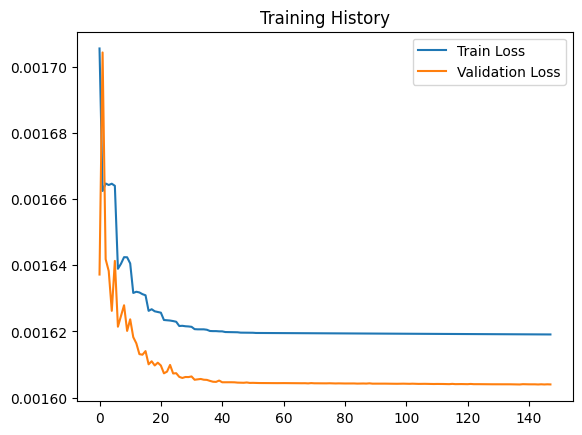

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training History")
plt.show()


In [17]:
test_dir = "prepared_data/test"
x_test = load_images_from_directory(test_dir)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

In [18]:
decoded_imgs = autoencoder.predict(x_test_noisy)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


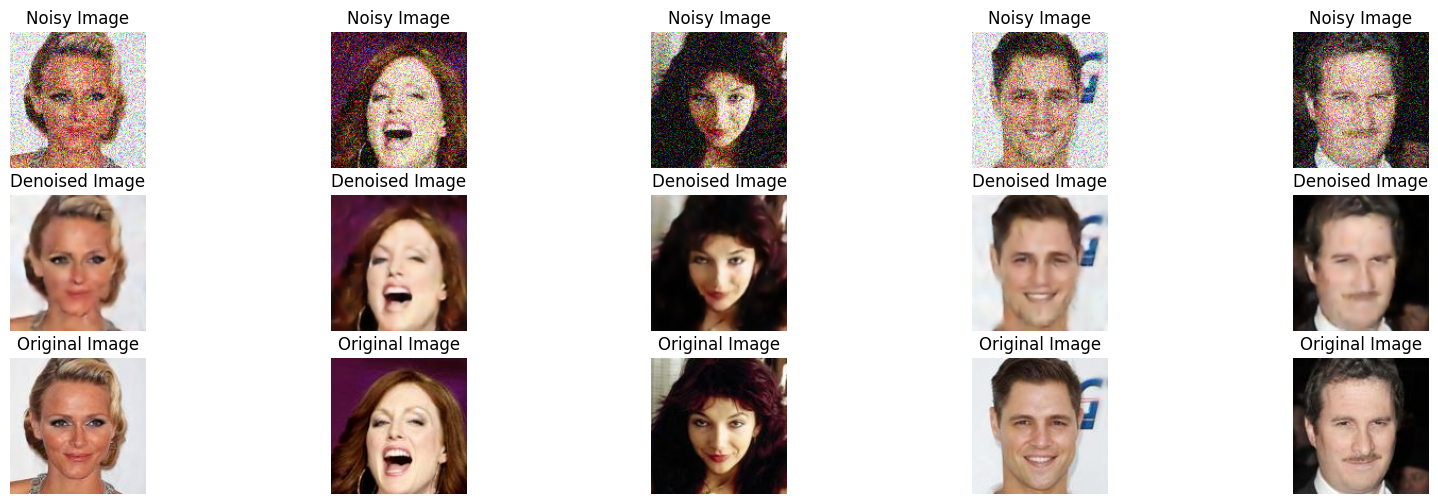

In [19]:
n = 5
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy Image")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised Image")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(x_test[i])
    plt.title("Original Image")
    plt.axis("off")
plt.show()